**This notebook contains code cells that pull clean data provided by the OECD and gets statistics for the number of AI-related patents in the world, over time. It also contains data for the number of AI-related patents by country.** 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# DATASET: Patents by Technology collected by the OECD
# LINK: https://stats.oecd.org/Index.aspx?DataSetCode=PATS_IPC#

patents = pd.read_csv("data/patent_oecd.csv")

In [23]:
len(patents)

1000000

In [7]:
aipatents = patents[patents['Technology domains & IPC'] == 'Technologies related to artificial intelligence']
aipatents_world = aipatents.groupby(['Time', 'KINDDATE', 'Patents Office & Patents Families', 
                                     'Reference country']).agg('sum').reset_index()
aipatents_world = aipatents_world[['Time', 'KINDDATE', 'Patents Office & Patents Families', 
                                   'Reference country', 'Value']]

In [8]:
test = aipatents_world[(aipatents_world['KINDDATE'] == 'PRIORITY') & 
                (aipatents_world['Patents Office & Patents Families'] == 'IP5 Patent families') & 
                (aipatents_world['Reference country'] == 'Inventor(s)\'s country(ies) of residence')]

In [9]:
aipatents_world = aipatents[aipatents['Country'] == 'World']
aipatents_world = aipatents_world.groupby(['Time', 'KINDDATE', 'Patents Office & Patents Families', 
                                     'Reference country']).agg('sum').reset_index()
aipatents_world = aipatents_world[['Time', 'KINDDATE', 'Patents Office & Patents Families', 
                                   'Reference country', 'Value']]
aipatents_world = aipatents_world[(aipatents_world['KINDDATE'] == 'PRIORITY') & 
                (aipatents_world['Patents Office & Patents Families'] == 'IP5 Patent families') & 
                (aipatents_world['Reference country'] == 'Inventor(s)\'s country(ies) of residence')]

aipatents_world.columns = ['Year', 'KindDate', 'Patents Office & Families', 'Ref. Country', 'num_patents']
aipatents_world['Year'] = pd.to_datetime(aipatents_world['Year'], format='%Y')
aipatents_world

,Year,KindDate,Patents Office & Families,Ref. Country,num_patents
13,1998-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,831.0
37,1999-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1139.0
61,2000-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1452.0
85,2001-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1386.0
109,2002-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1563.0
133,2003-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1593.0
157,2004-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1576.0
181,2005-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1818.0
205,2006-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1969.0
229,2007-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,2183.0


Text(0.5, 1.0, 'Figure 1: Number of AI-related Patents in the World, by Year')

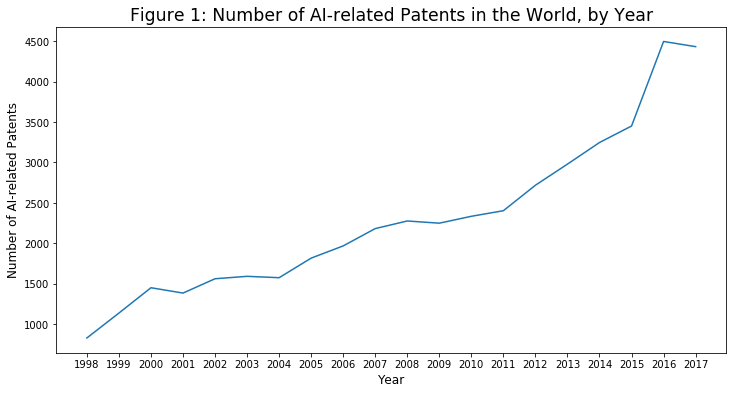

In [30]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1998, 2018), aipatents_world['num_patents'])
plt.xticks(np.arange(1998, 2018))
plt.xlabel("Year", fontsize='large')
plt.ylabel("Number of AI-related Patents", fontsize='large')
plt.title("Figure 1: Number of AI-related Patents in the World, by Year", fontsize='xx-large')

In [11]:
# save the aipatents dataframe to csv
aipatents_world.to_csv('data/aipatents_world.csv')

In [21]:
df = aipatents_world.groupby('KindDate').agg({'Year': 'count', 'num_patents':'mean'})

In [22]:
df = df.reset_index()
df.columns = 

,Year,num_patents
KindDate,,
PRIORITY,20,2305.05


In [26]:
aipatents_world

,Year,KindDate,Patents Office & Families,Ref. Country,num_patents
13,1998-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,831.0
37,1999-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1139.0
61,2000-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1452.0
85,2001-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1386.0
109,2002-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1563.0
133,2003-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1593.0
157,2004-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1576.0
181,2005-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1818.0
205,2006-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,1969.0
229,2007-01-01,PRIORITY,IP5 Patent families,Inventor(s)'s country(ies) of residence,2183.0
